### importation of libraries

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer

#### Loading the dataset from directory

In [119]:
data=pd.read_csv(r'src\data\AmazonEcho2Reviews.csv')

### Calculating the Target column "SentimentLabel"

In [120]:
data['SentimentLabel']=data['Rating'].apply(lambda x: "Positive" if x>3 else('Neutral' if x==3 else 'Negative'))

## Data Exploration

#### How data looks like

In [90]:
data.head()

,Pageurl,Title,Review Text,Review Color,User Verified,Review Date,Review Useful Count,Configuration Text,Rating,Declaration Text,SentimentLabel
0,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Three Stars,Not great speakers,Black,Verified Purchase,10/3/2017,NaN,Echo Dot,3,NaN,Neutral
1,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Four Stars,Great little gagit,White,Verified Purchase,9/26/2017,NaN,Echo Dot,4,NaN,Positive
2,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Awesome!,Awesome 👏🏽,White,Verified Purchase,9/8/2017,NaN,Echo Dot,5,NaN,Positive
3,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Five Stars,Love my Echo,Black,Verified Purchase,10/19/2017,NaN,Echo Dot,5,NaN,Positive
4,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Five Stars,Great device,Black,Verified Purchase,9/17/2017,NaN,Echo Dot,5,NaN,Positive


#### The number of rows and columns present inside the dataset

In [91]:
data.shape

(6855, 11)

#### Checking basic meta information about the data

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6855 entries, 0 to 6854
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pageurl              6855 non-null   object 
 1   Title                6855 non-null   object 
 2   Review Text          6850 non-null   object 
 3   Review Color         6855 non-null   object 
 4   User Verified        6641 non-null   object 
 5   Review Date          6855 non-null   object 
 6   Review Useful Count  28 non-null     float64
 7   Configuration Text   6855 non-null   object 
 8   Rating               6855 non-null   int64  
 9   Declaration Text     6 non-null      object 
 10  SentimentLabel       6855 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 589.2+ KB


##### NOTE:<br>
1) The Date column is not in correct format<br>
2) There are various missing values present inside the dataset<br>
3) Review Useful Count should be of type "integer" not 'float'.<br>


#### Checking missing records inside each col of dataset

In [93]:
data.isna().sum()

Pageurl                   0
Title                     0
Review Text               5
Review Color              0
User Verified           214
Review Date               0
Review Useful Count    6827
Configuration Text        0
Rating                    0
Declaration Text       6849
SentimentLabel            0
dtype: int64

#### Dropping Columns containing missing values more than 90%

In [94]:
data.dropna(subset=['Review Text'],inplace=True)
data['User Verified']=data['User Verified'].fillna('Not Verified')
if 'Review Useful Count' in data.columns:
    data.drop(['Review Useful Count','Declaration Text','Pageurl'],axis=1,inplace=True)


In [95]:
data.isnull().sum()

Title                 0
Review Text           0
Review Color          0
User Verified         0
Review Date           0
Configuration Text    0
Rating                0
SentimentLabel        0
dtype: int64

#### Checkking he duuplicate records present inside the dataset

In [96]:
data.duplicated().sum()

np.int64(661)

#### Basic exploration about statistics of the dataset

In [97]:
data.describe()

,Rating
count,6850.000000
mean,4.206569
std,1.272868
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Note<br>
1) in "Review Useful Count" the standard-deviation is less than mean of the column, hence data would be clustered about the mean<mean<br>

#### Deriving the numerical and categorical features from the dataset

In [98]:
numeric_cols=list(data.select_dtypes(exclude="O").columns)
categorical_cols=list(data.select_dtypes(include="O").columns)
target_col='SentimentLabel'
categorical_cols.remove(target_col)

## Data Cleaning

### Number of unique categories in each of the column

In [99]:
data.nunique()

Title                 3411
Review Text           5832
Review Color             2
User Verified            2
Review Date             56
Configuration Text       2
Rating                   5
SentimentLabel           3
dtype: int64

#### Making correction to the dtype of the date and Useful Review Count column

In [100]:
data['Review Date']=pd.to_datetime(data['Review Date'])

In [113]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [114]:
# Numeric Pipeline
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
numeric_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [116]:
# Categorical Pipeline
categoric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', LabelEncoder())
])
categoric_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', LabelEncoder())])

In [117]:
# Combine Numeric and Categorical Pipelines
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_cols),
    ('cat', categoric_pipeline, categorical_cols)
])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Rating']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', LabelEncoder())]),
                                 ['Title', 'Review Text', 'Review Color',
                                  'User Verified', 'Review Date',
                                  'Configuration Text'])])

In [104]:
### Encoding the target column
data[target_col]=data[target_col].map({'Positive':2,'Neutral':1,'Negative':0})

## EDA

#### Distribution of Target column

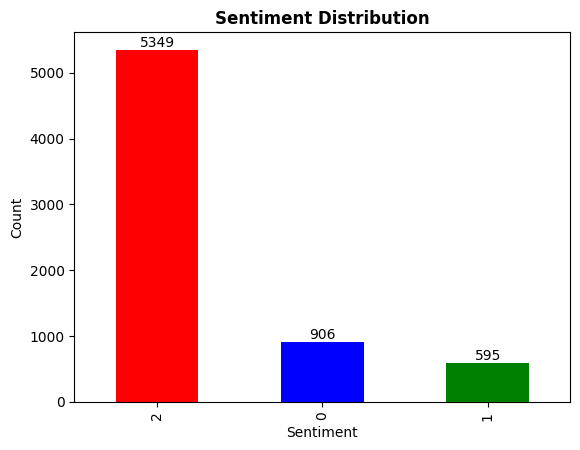

In [105]:
data[target_col].value_counts().plot(kind='bar',color=['red','blue','green'])
plt.title('Sentiment Distribution',weight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Count')
for index,label in enumerate(data[target_col].value_counts()):
    plt.text(index,label, str(label), ha='center', va='bottom')
plt.show()

#### Note:<br>
1) Data is highly imblanced in nature

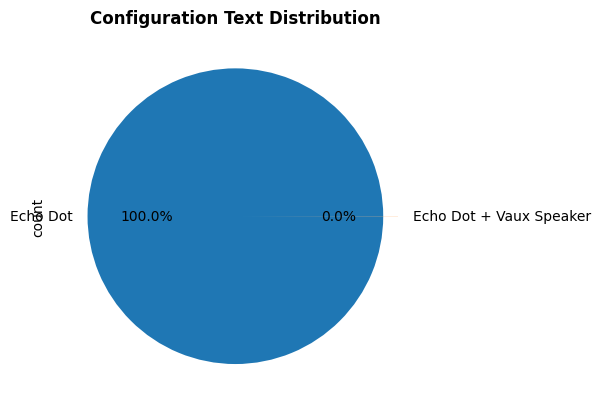

In [106]:
data['Configuration Text'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=[0,0.1])
plt.title('Configuration Text Distribution',weight='bold')
plt.show()

##### Since the value is almost consistent, it would be better to drop this column from the dataset

In [107]:
data.drop(['Configuration Text'],axis=1,inplace=True)

##### Distribution of the Review Color column

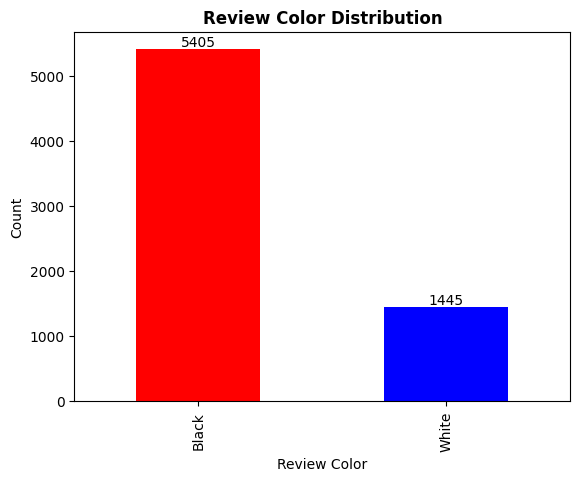

In [108]:
color_counts=data['Review Color'].value_counts()
color_counts.plot(kind='bar',color=['red','blue'])
plt.title('Review Color Distribution',weight='bold')
plt.xlabel('Review Color')
plt.ylabel('Count')
for idx,label in enumerate(color_counts):
    plt.text(idx,label,str(label),ha='center',va='bottom')
plt.show()


##### Distribution of the User Verified column

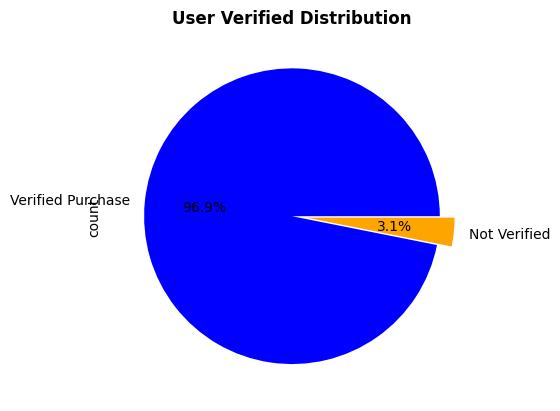

In [109]:
verified_counts=data['User Verified'].value_counts()
verified_counts.plot(kind='pie',colors=['blue','orange'],autopct='%1.1f%%',explode=[0,0.1])
plt.title('User Verified Distribution',weight='bold')
plt.show()

### Distribution of Review count by day

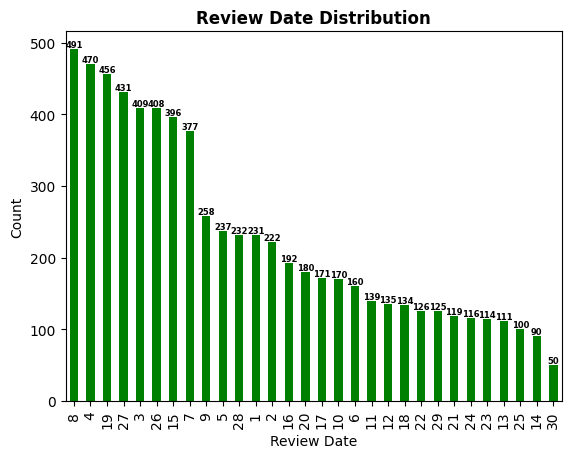

In [110]:
review_counts=data['Review Date'].dt.day.value_counts()
review_counts.plot(kind='bar',color='green')
plt.title('Review Date Distribution',weight='bold')
plt.xlabel('Review Date')
plt.ylabel('Count')
for idx,label in enumerate(review_counts):
    plt.text(idx,label,str(label),ha='center',va='bottom',fontsize=6, weight='bold')
plt.show()

### Data Split

In [111]:
from sklearn.model_selection import train_test_split
X=data.drop(target_col,axis=1)
y=data[target_col]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [112]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5480, 6) (1370, 6) (5480,) (1370,)


#### Performing Pre-processing of the categorical columns

In [ ]:
preprocessor